In [1]:
import pandas as pd

df = pd.read_csv('analysis_node_0_to_3.csv')
varients = [i.split('_')[1] for i in df.filename]
cbr_rate = [i.split('_')[2][3:] for i in df.filename]
simulation = [i.split('_')[3][:-3] for i in df.filename]
df['varients'] = varients
df['cbr_rate'] = cbr_rate
df['simulation'] = simulation

duration_m = [12, 11, 10, 11, 10, 9, 8.5, 12, 12, 12, 12]
duration = [ duration_m[int(s[10:])]for s in df.simulation]
df['duration'] = pd.Series(duration)
df.throughput /= df.duration

agg_df = df.groupby(['varients', 'cbr_rate']).agg('mean').reset_index()
agg_df


,varients,cbr_rate,drop_rate,throughput,RTT,duration
0,newreno,1mb,0.003830,7.147407,0.073352,10.863636
1,newreno,3mb,0.005251,5.841790,0.075410,10.863636
2,newreno,5mb,0.007711,4.298617,0.075146,10.863636
3,newreno,7mb,0.012545,2.768625,0.077814,10.863636
4,newreno,8mb,0.022680,1.849176,0.079870,10.863636
5,reno,1mb,0.004432,6.144358,0.071646,10.863636
6,reno,3mb,0.005443,5.660863,0.074854,10.863636
7,reno,5mb,0.008456,3.931537,0.075034,10.863636
8,reno,7mb,0.013925,2.420375,0.076199,10.863636
9,reno,8mb,0.025286,1.558918,0.076821,10.863636


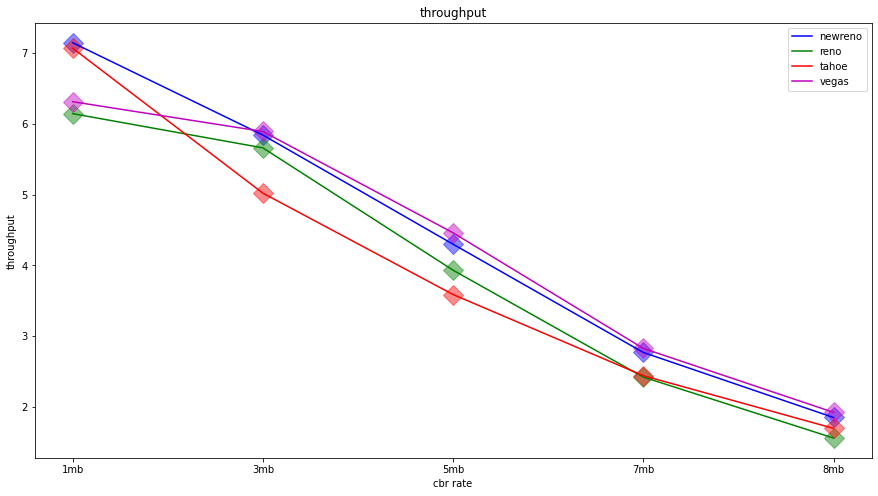

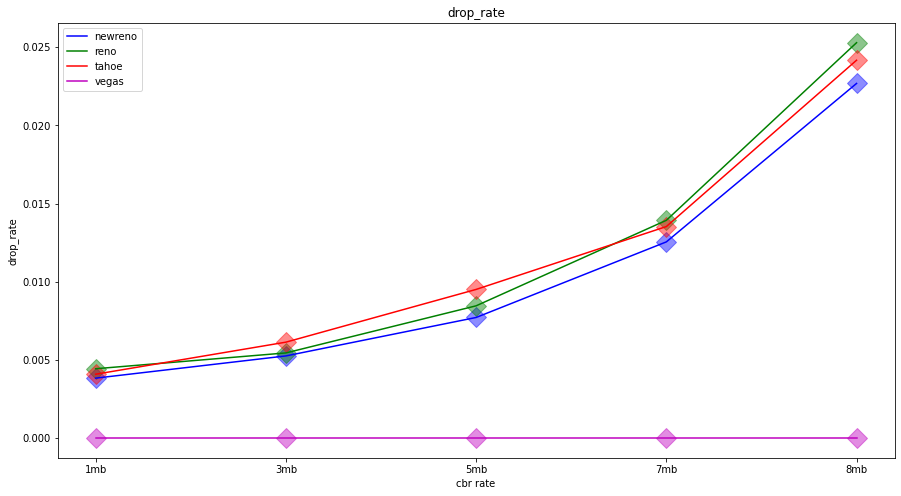

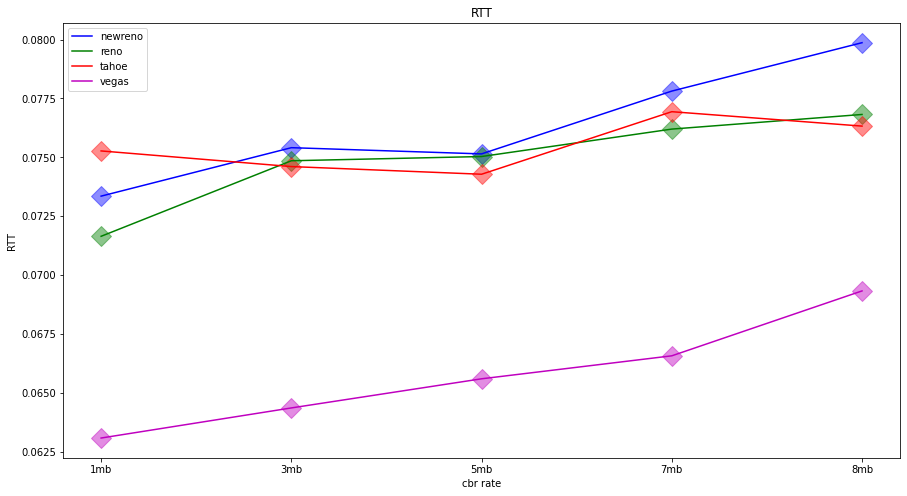

In [4]:
from matplotlib import pyplot as plt


color_m = dict(zip(agg_df.varients.unique(), 'bgrm'))

def plot(df, v, col):
    #plt.boxplot([df[df.cbr_rate == i][col] for i in df.cbr_rate.unique()])
    df = df[df.varients == v]
    plt.scatter(df.cbr_rate, df[col], c=color_m[v], alpha=0.45, s=200, marker='D')
    return plt.plot(df.cbr_rate, df[col], c=color_m[v], label=v)

for col in ['throughput', 'drop_rate', 'RTT']:
    plt.figure(figsize=(15, 8))
    plt.title(col)
    plt.xlabel('cbr rate')
    plt.ylabel(col)
    plt.legend(handles=[
        plot(agg_df, v, col)[0]
        for v in agg_df.varients.unique()
    ])
    plt.show()
    